In [88]:
import pandas as pd

# Load the CSV file
file_path = 'diabetes (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace zero values with NaN for specific columns
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zero:
    data[column] = data[column].replace(0, pd.NA)

# Fill missing values with the median of each column
for column in columns_with_zero:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)
    data[column] = data[column].astype(float)  # Ensure the column is converted to float

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\Harthik\AppData\Local\Temp\ipykernel_6868\1346436268.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(median_value)
C:\Users\Harthik\AppData\Local\Temp\ipykernel_6868\1346436268.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(median_value)
C:\Users\Harthik\AppData\Local\Temp\ipykernel_6868\1346436268.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) 

Linear Regression Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



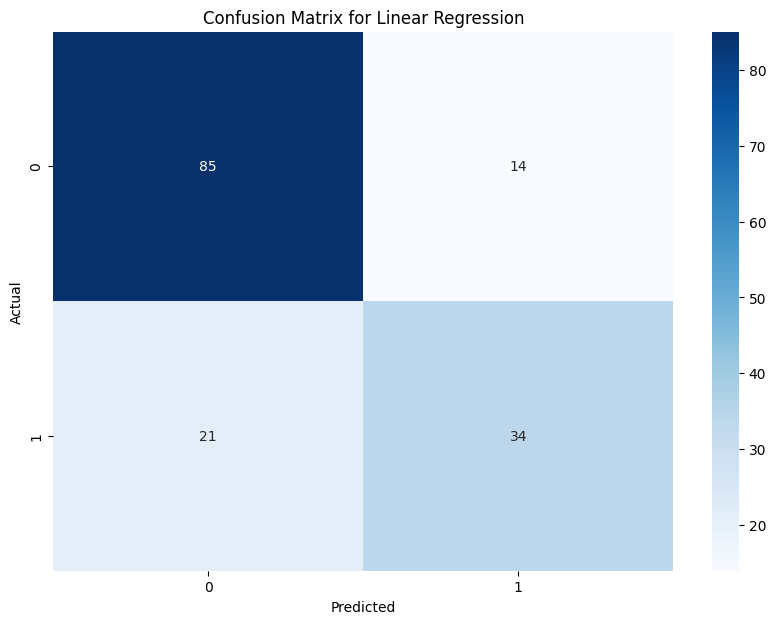

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = linear_reg.predict(X_test_scaled)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]  # Convert to binary
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Linear Regression Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Regression')
plt.show()


Logistic Regression Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



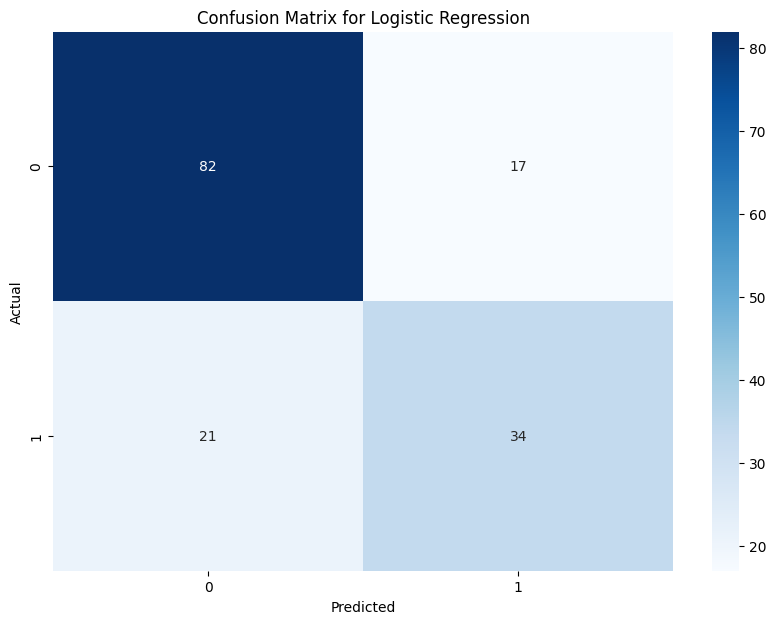

In [91]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = logistic_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


SVM Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



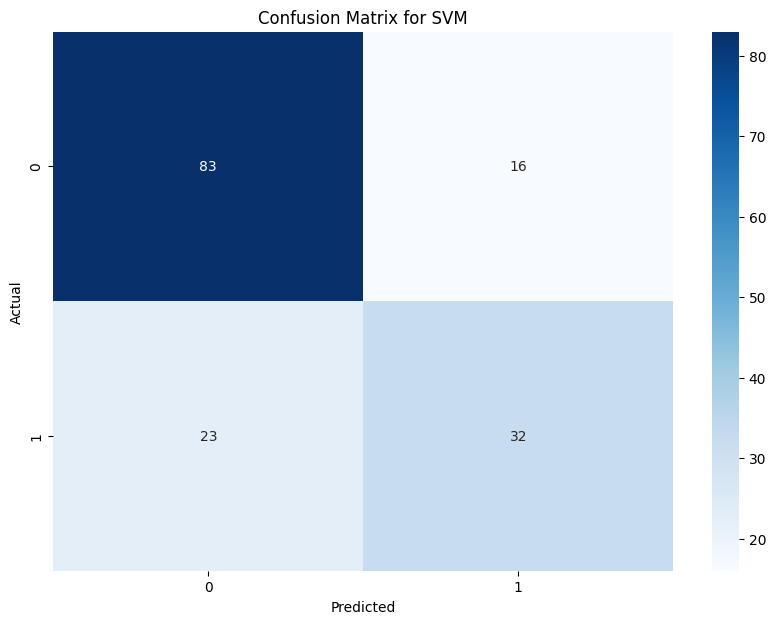

In [92]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


Decision Tree Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



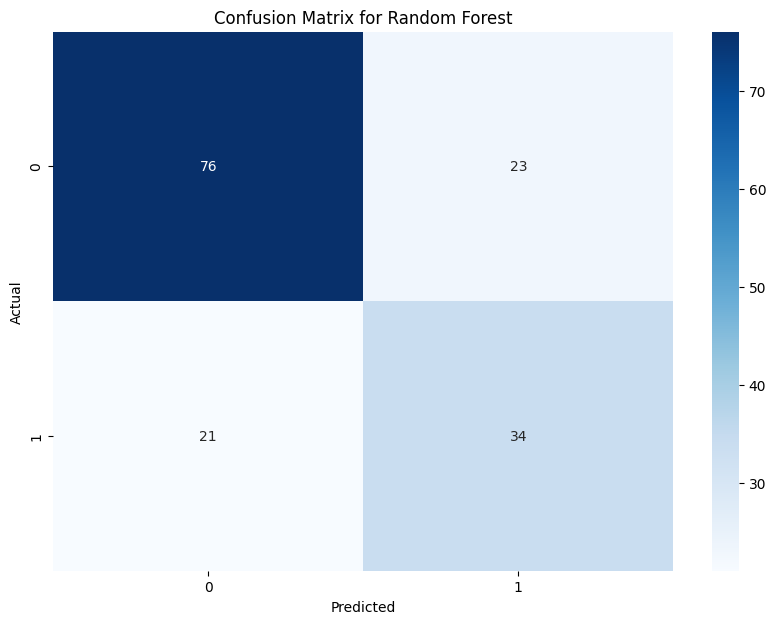

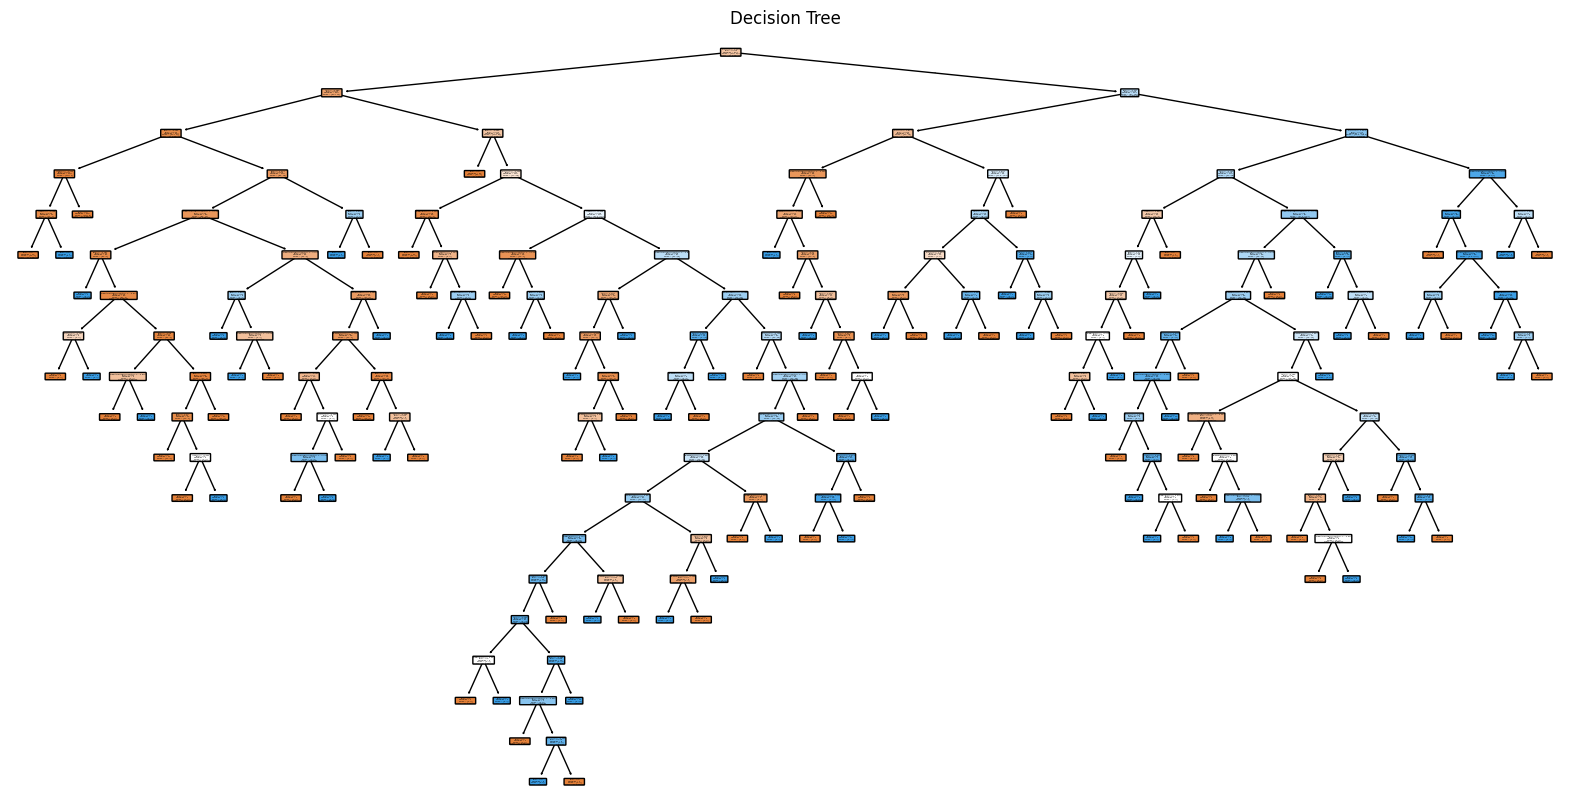

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree')
plt.show()


Random Forest Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



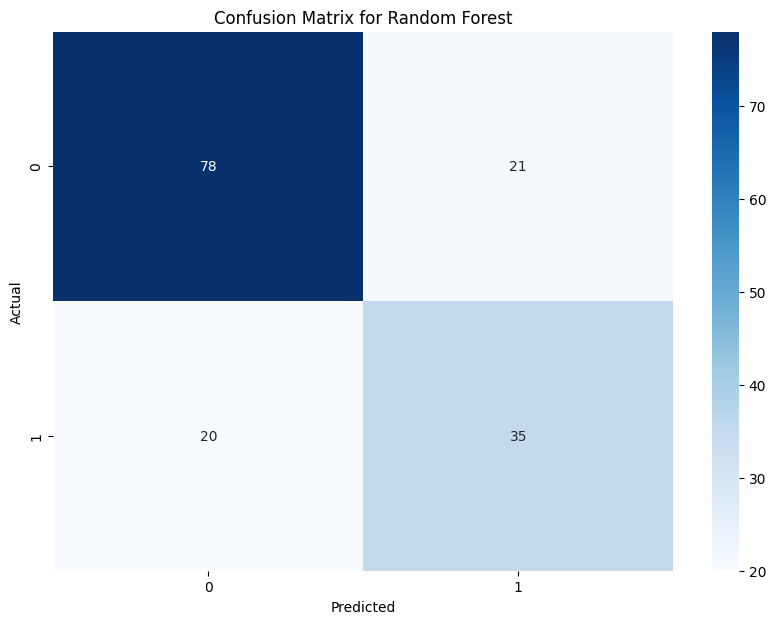

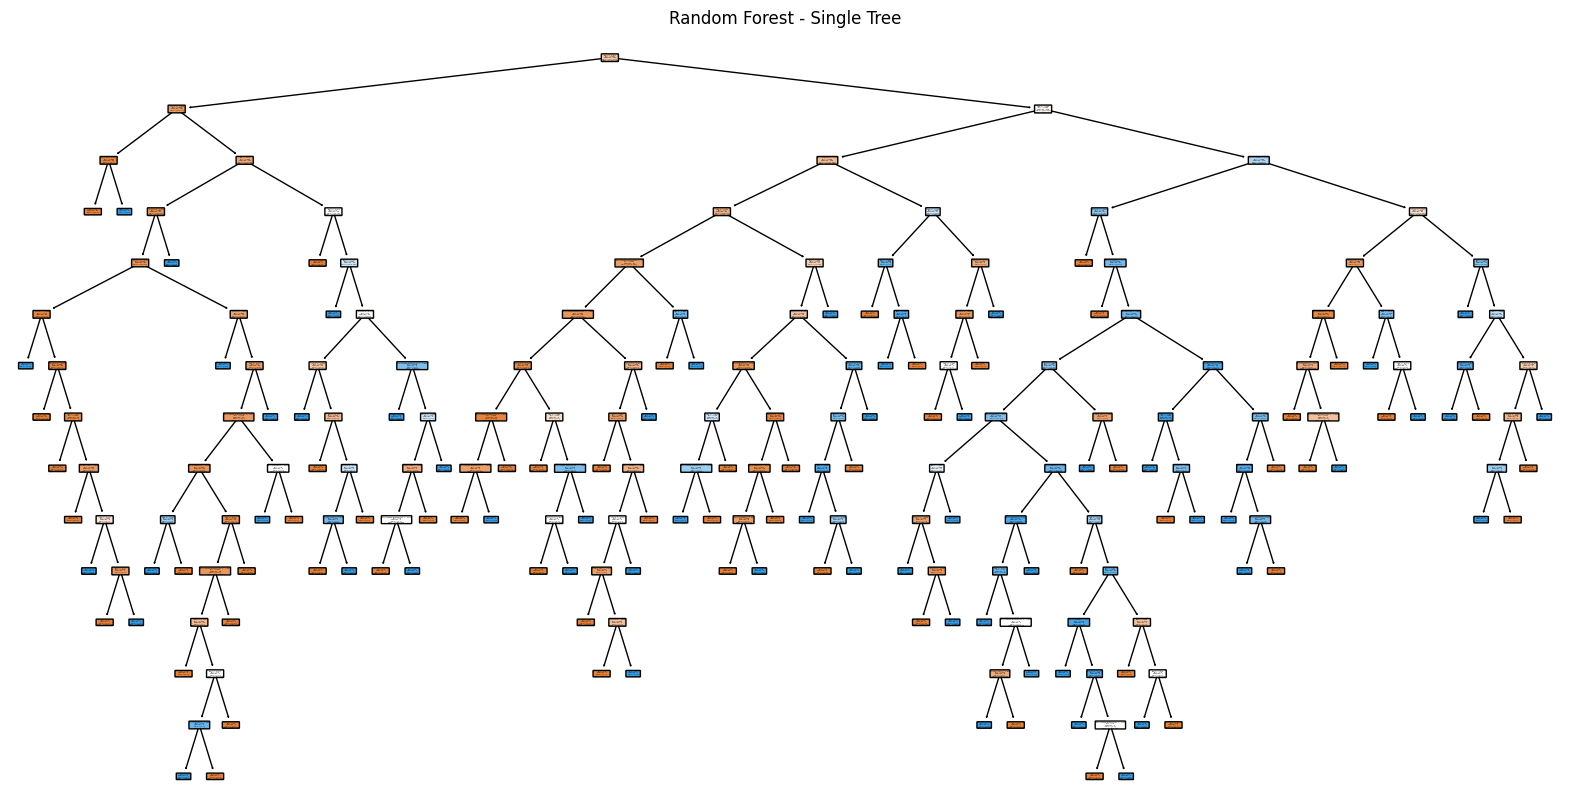

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = random_forest.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Plot one tree from the random forest
plt.figure(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Random Forest - Single Tree')
plt.show()


Naive Bayes Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



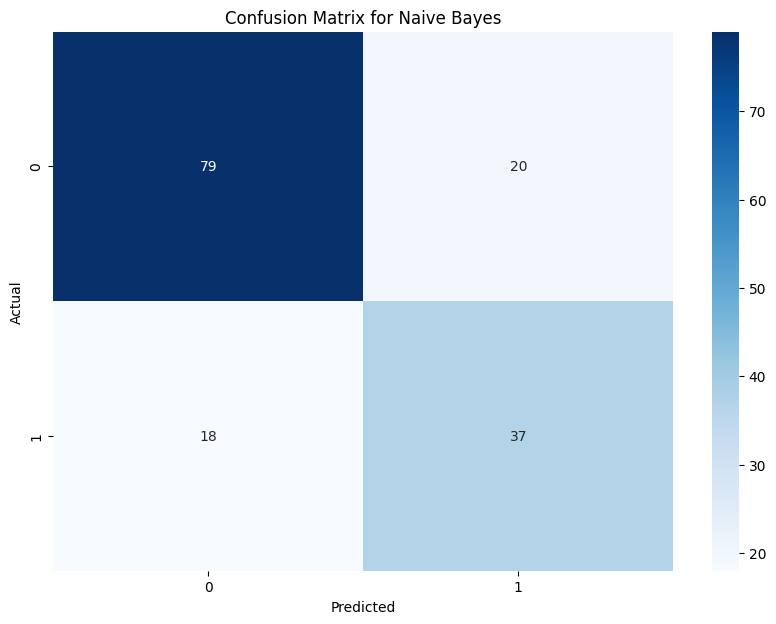

In [95]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = naive_bayes.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


KNN Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



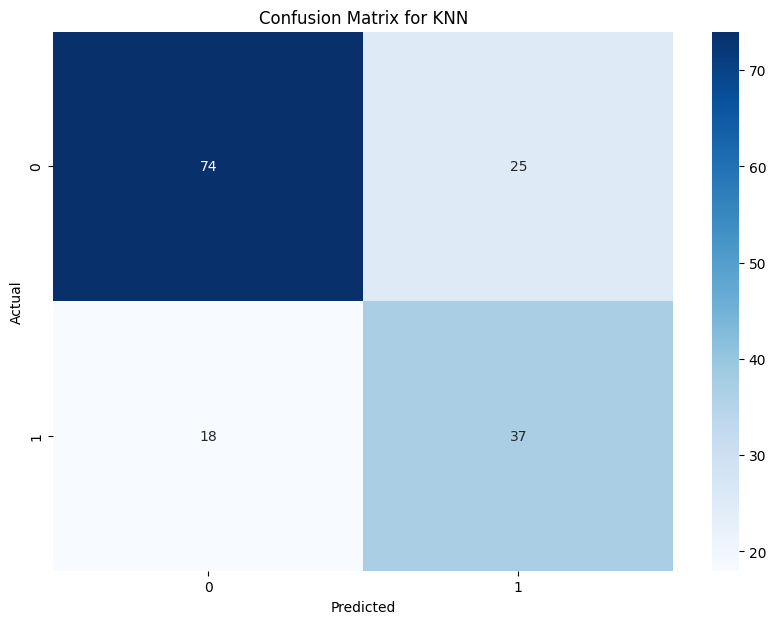

In [96]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()


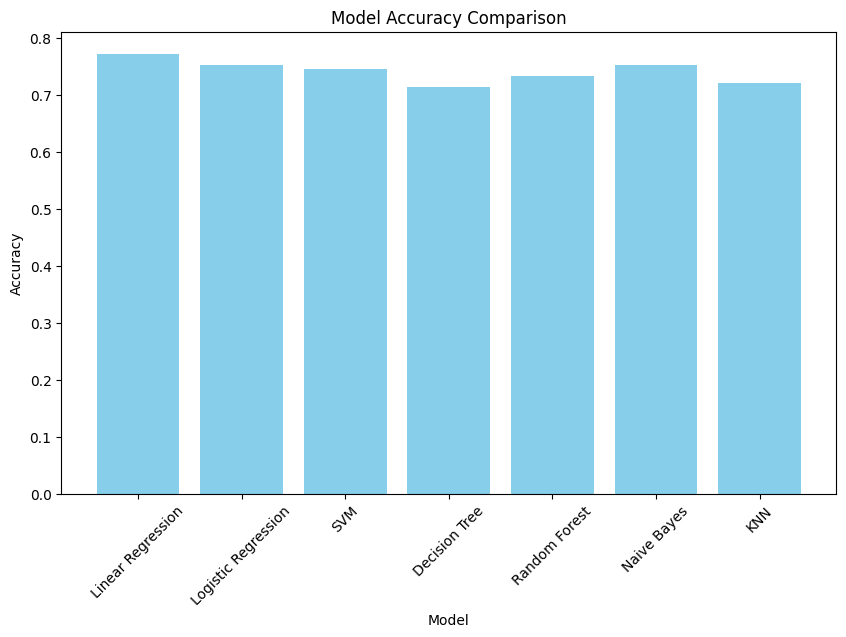

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the accuracy of each model
accuracy_scores = {
    'Linear Regression':accuracy,
    'Logistic Regression': accuracy_log,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Naive Bayes': accuracy_nb,
    'KNN': accuracy_knn
}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()
